In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
pubg2 = pd.read_csv("pubg.csv")
pubg2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4444415 entries, 0 to 4444414
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
y                  int64
dtypes: float64(5), int64(20), object(4)
memory usage: 983.3+ MB


In [87]:
# correlation matrix
# features in type 'object' (Id, groupId, matchId, matchType) are dropped here
corr = pubg2.corr()

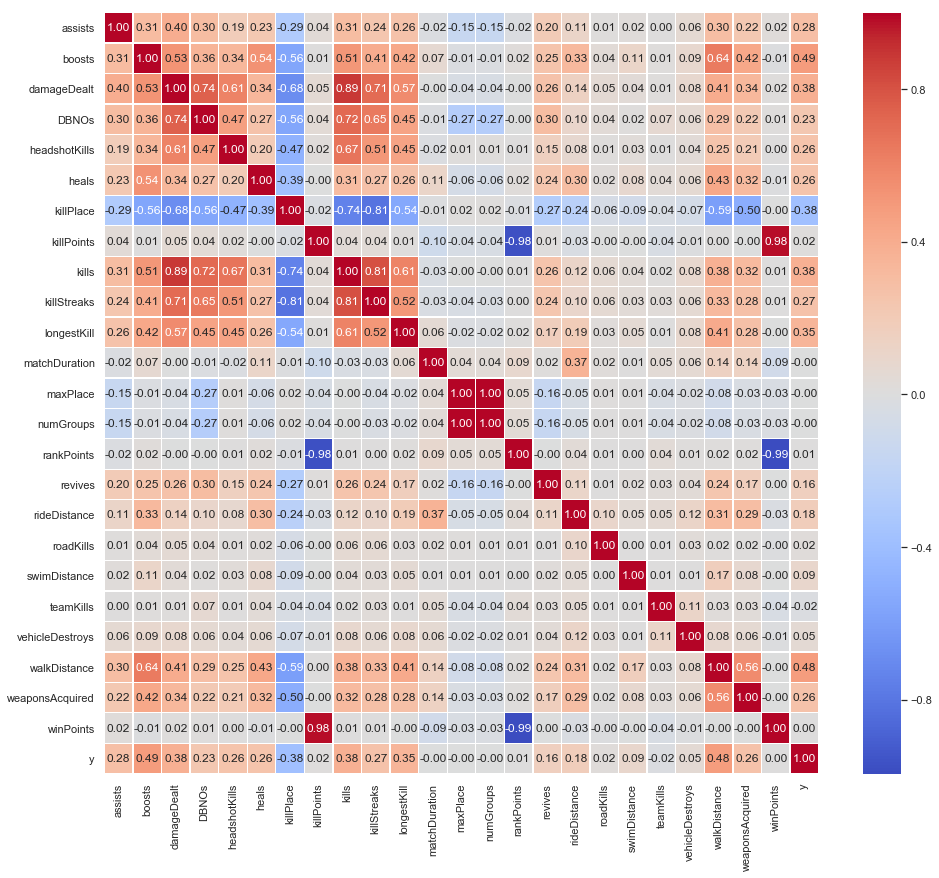

In [88]:
# plot the heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr, annot=True, linewidths=.3, cmap='coolwarm', fmt='.2f')
sns.set(font_scale=1)
plt.savefig('heatmap_full')
plt.show()

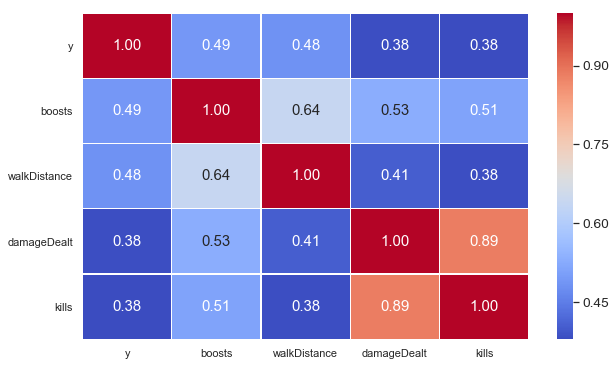

In [89]:
# let's see the heatmap for the 4 features that are most correlated with targat
f,ax = plt.subplots(figsize=(10, 6))
cols = corr.nlargest(5, 'y')['y'].index
cm = np.corrcoef(pubg2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, annot=True, linewidths=.3, cmap='coolwarm', fmt='.2f',yticklabels=cols.values, xticklabels=cols.values)
plt.savefig('heatmap_y')
plt.show()

We decided to not use PCA here because using PCA will decrease the interpretability of our model, while our goal is to find out what behaviours can giva us higher chance of win.

### Feature Engineering

Based on our game experience, we think there are some hidden features in the data that are correlated with our target and some features can be combined to be more meaningful.

1) As there is no guarantee of there being 100 players per match, some features are not compareable in match of different sizes (i.e. kills, it's easier to meet and kill someone in a match of size 100 than of size 80), so it's meaningful to normalize these features based on number of players in the match.

In [6]:
# create a new feature for number of players in a match
pubg2['numPlayers'] = pubg2.groupby('matchId')['matchId'].transform('count')
pubg2.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,y,numPlayers
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.0,0,0,0,60,...,0.0000,0,0.00,0,0,244.80,1,1466,0,96
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.5,0,0,0,57,...,0.0045,0,11.04,0,0,1434.00,5,0,0,91
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.0,0,0,0,47,...,0.0000,0,0.00,0,0,161.80,2,0,0,98
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.9,0,0,0,75,...,0.0000,0,0.00,0,0,202.80,3,0,0,91
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.0,0,0,0,45,...,0.0000,0,0.00,0,0,49.75,2,0,0,97


In [7]:
pubg2['groupSize'] = pubg2.groupby('groupId')['groupId'].transform('count')
pubg2.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,y,numPlayers,groupSize
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.0,0,0,0,60,...,0,0.00,0,0,244.80,1,1466,0,96,4
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.5,0,0,0,57,...,0,11.04,0,0,1434.00,5,0,0,91,4
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.0,0,0,0,47,...,0,0.00,0,0,161.80,2,0,0,98,2
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.9,0,0,0,75,...,0,0.00,0,0,202.80,3,0,0,91,1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.0,0,0,0,45,...,0,0.00,0,0,49.75,2,0,0,97,1


In [8]:
# from collections import Counter
pubg2['meanGroupSize'] = pubg2.groupby('matchId')['groupSize'].transform('mean')
pubg2.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,y,numPlayers,groupSize,meanGroupSize
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.0,0,0,0,60,...,0.00,0,0,244.80,1,1466,0,96,4,4.333333
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.5,0,0,0,57,...,11.04,0,0,1434.00,5,0,0,91,4,4.626374
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.0,0,0,0,47,...,0.00,0,0,161.80,2,0,0,98,2,2.367347
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.9,0,0,0,75,...,0.00,0,0,202.80,3,0,0,91,1,3.923077
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.0,0,0,0,45,...,0.00,0,0,49.75,2,0,0,97,1,1.041237


We want to normalize the following features:

damageDealt - Total damage dealt. 

matchDuration - Duration of match in seconds.

maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.

kills - Number of enemy players killed.

In [9]:
pubg2['damageDealtN'] = pubg2['damageDealt']*((100-pubg2['numPlayers'])/100 + 1)
pubg2['matchDurationN'] = pubg2['matchDuration']*((100-pubg2['numPlayers'])/100 + 1)
pubg2['maxPlaceN'] = pubg2['maxPlace']*((100-pubg2['numPlayers'])/100 + 1)
pubg2['killsN'] = pubg2['kills']*((100-pubg2['numPlayers'])/100 + 1)
pubg2[['numPlayers','damageDealt','damageDealtN', 'matchDuration','matchDurationN', 'maxPlace', 'maxPlaceN', 'kills', 'killsN']].head()

,numPlayers,damageDealt,damageDealtN,matchDuration,matchDurationN,maxPlace,maxPlaceN,kills,killsN
0,96,0.0,0.000,1306,1358.24,28,29.12,0,0.00
1,91,91.5,99.735,1777,1936.93,26,28.34,0,0.00
2,98,68.0,69.360,1318,1344.36,50,51.00,0,0.00
3,91,32.9,35.861,1436,1565.24,31,33.79,0,0.00
4,97,100.0,103.000,1424,1466.72,97,99.91,1,1.03


In [10]:
pubg2 = pubg2.drop(columns = ['numPlayers','damageDealt', 'matchDuration', 'maxPlace', 'kills'])

(2) Some features can be combined

In [11]:
pubg2['items'] = pubg2['heals'] + pubg2['boosts']
pubg2['total_distance'] = pubg2['rideDistance'] + pubg2['swimDistance'] + pubg2['walkDistance']
pubg2[['heals','boosts', 'items','rideDistance', 'swimDistance', 'walkDistance','total_distance']].head()

,heals,boosts,items,rideDistance,swimDistance,walkDistance,total_distance
0,0,0,0,0.0000,0.00,244.80,244.8000
1,0,0,0,0.0045,11.04,1434.00,1445.0445
2,0,0,0,0.0000,0.00,161.80,161.8000
3,0,0,0,0.0000,0.00,202.80,202.8000
4,0,0,0,0.0000,0.00,49.75,49.7500


In [12]:
pubg2[['heals','boosts', 'items','rideDistance', 'swimDistance', 'walkDistance','total_distance']].head()
# pubg2 = pubg2.drop(columns = ['heals','boosts', 'rideDistance', 'swimDistance', 'walkDistance'])

,heals,boosts,items,rideDistance,swimDistance,walkDistance,total_distance
0,0,0,0,0.0000,0.00,244.80,244.8000
1,0,0,0,0.0045,11.04,1434.00,1445.0445
2,0,0,0,0.0000,0.00,161.80,161.8000
3,0,0,0,0.0000,0.00,202.80,202.8000
4,0,0,0,0.0000,0.00,49.75,49.7500


In [13]:
# solo = pubg2.loc[pubg2['matchType'].str.contains('solo')]
# pd.unique(solo['matchType'])

### Train-test split

In [14]:
from sklearn.model_selection import train_test_split
# for the model of all match type
data = pubg2.copy().drop(columns = ['Id', 'groupId', 'matchId'])
train = data.sample(frac = 0.7, random_state = 0)
test = data.drop(train.index)
# further split for validation
validation = train.sample(frac = 0.3, random_state = 0)
train = train.drop(validation.index)
modelVal = test.sample(frac = 0.3, random_state = 0)
test = test.drop(modelVal.index)

### Split based on match type

We think the importance features might be different for different match types. 

Before doing feature selection, we will split the data based on match type first. 

In [15]:
# for model of solo
solo_train = train.loc[train['matchType'].str.contains('solo')].drop(columns = 'matchType')
solo_test = test.loc[test['matchType'].str.contains('solo')].drop(columns = 'matchType')
solo_val = validation.loc[validation['matchType'].str.contains('solo')].drop(columns = 'matchType')
solo_modelVal = modelVal.loc[modelVal['matchType'].str.contains('solo')].drop(columns = 'matchType')

In [16]:
# for model of duo
duo_train = train.loc[train['matchType'].str.contains('duo')].drop(columns = 'matchType')
duo_test = test.loc[test['matchType'].str.contains('duo')].drop(columns = 'matchType')
duo_val = validation.loc[validation['matchType'].str.contains('duo')].drop(columns = 'matchType')
duo_modelVal = modelVal.loc[modelVal['matchType'].str.contains('duo')].drop(columns = 'matchType')

In [17]:
# for model of squad
squad_train = train.loc[train['matchType'].str.contains('squad')].drop(columns = 'matchType')
squad_test = test.loc[test['matchType'].str.contains('squad')].drop(columns = 'matchType')
squad_val = validation.loc[validation['matchType'].str.contains('squad')].drop(columns = 'matchType')
squad_modelVal = modelVal.loc[modelVal['matchType'].str.contains('squad')].drop(columns = 'matchType')

In [18]:
train = train.drop(columns = 'matchType')
test = test.drop(columns = 'matchType')
validation = validation.drop(columns = 'matchType')
modelVal = modelVal.drop(columns = 'matchType')

### Use RandomForest to select features based on feature importance.

In [19]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

### Full data

In [20]:
# Since the dataset is too large, we use a sample of size 5000 to do the feature selection
# Find the important features for all match types
trainRF = train.sample(n = 50000,random_state = 0)
xTrain = trainRF.copy().drop(columns ='y')
yTrain = trainRF['y']
xVal = validation.copy().drop(columns ='y')
yVal = validation['y']

In [21]:
rf = RandomForestClassifier(n_estimators= 100, max_features='sqrt')
rf.fit(xTrain, yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
feature_importance = rf.feature_importances_

Text(0.5, 0, 'Random Forest Feature Importance')

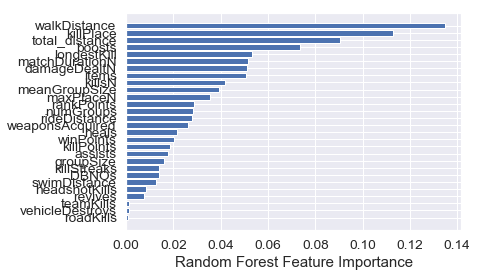

In [23]:
sorted_idx = feature_importance.argsort()
plt.barh(xTrain.columns[sorted_idx], feature_importance[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
thresholds = [0.01,0.02,0.03,0.04,0.05]
bestThre = 0.01
acc = 0
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(rf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(xTrain)
    # train model
    selection_model = RandomForestClassifier(n_estimators= 30)
    selection_model.fit(select_X_train, yTrain)
    # eval model
    select_X_val = selection.transform(xVal)
    predictions = selection_model.predict(select_X_val)
    accuracy = accuracy_score(yVal, predictions)
    if accuracy > acc:
        acc = accuracy
        bestThre = thresh
    print("Thresh=%.2f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.01, n=23, Accuracy: 92.24%
Thresh=0.02, n=17, Accuracy: 92.08%
Thresh=0.03, n=11, Accuracy: 92.12%
Thresh=0.04, n=9, Accuracy: 92.11%
Thresh=0.05, n=8, Accuracy: 91.76%


In [25]:
indices = np.argsort(-feature_importance)
i = 0
while feature_importance[indices[i]] > bestThre:
    i += 1
print(i, ' features to keep')

23  features to keep


In [26]:
featKeep = xTrain.columns[indices[:i]]
featKeep

Index(['walkDistance', 'killPlace', 'total_distance', 'boosts', 'longestKill',
       'matchDurationN', 'damageDealtN', 'items', 'killsN', 'meanGroupSize',
       'maxPlaceN', 'rankPoints', 'numGroups', 'rideDistance',
       'weaponsAcquired', 'heals', 'winPoints', 'killPoints', 'assists',
       'groupSize', 'killStreaks', 'DBNOs', 'swimDistance'],
      dtype='object')

### Solo data

In [27]:
# Find the important features for solo
solo_trainRF = solo_train.sample(n = 50000, random_state = 0)
solo_xTrain = solo_trainRF.copy().drop(columns ='y')
solo_yTrain = solo_trainRF['y']
solo_xVal = solo_val.copy().drop(columns ='y')
solo_yVal = solo_val['y']

In [28]:
solo_rf = RandomForestClassifier(n_estimators= 100, max_features='sqrt')
solo_rf.fit(solo_xTrain, solo_yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

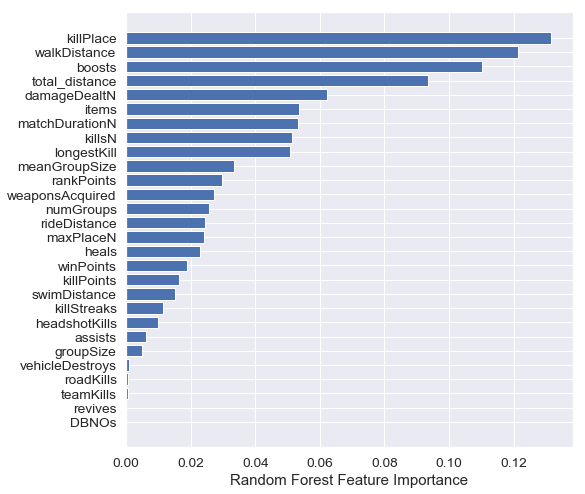

In [91]:
solo_feature_importance = solo_rf.feature_importances_
solo_sorted_idx = solo_feature_importance.argsort()
plt.figure(figsize = (8,8))
plt.barh(solo_xTrain.columns[solo_sorted_idx], solo_feature_importance[solo_sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.savefig('ftimp')

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
thresholds = [0.01,0.02,0.03,0.04,0.05]
bestThre = 0.01
acc = 0
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(solo_rf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(solo_xTrain)
    # train model
    selection_model = RandomForestClassifier(n_estimators= 30)
    selection_model.fit(select_X_train, solo_yTrain)
    # eval model
    select_X_val = selection.transform(solo_xVal)
    predictions = selection_model.predict(select_X_val)
    accuracy = accuracy_score(solo_yVal, predictions)
    if accuracy > acc:
        acc = accuracy
        bestThre = thresh
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.010, n=20, Accuracy: 93.20%
Thresh=0.020, n=16, Accuracy: 93.18%
Thresh=0.030, n=10, Accuracy: 93.20%
Thresh=0.040, n=9, Accuracy: 93.14%
Thresh=0.050, n=9, Accuracy: 93.17%


In [31]:
indices = np.argsort(-solo_feature_importance)
i = 0
while solo_feature_importance[indices[i]] > bestThre:
    i += 1
print(i, ' features to keep')

10  features to keep


In [32]:
solo_featKeep = xTrain.columns[indices[:i]]
solo_featKeep

Index(['killPlace', 'walkDistance', 'boosts', 'total_distance', 'damageDealtN',
       'items', 'matchDurationN', 'killsN', 'longestKill', 'meanGroupSize'],
      dtype='object')

### Duo data

In [33]:
# Find the important features for duo
duo_trainRF = duo_train.sample(n = 50000, random_state = 0)
duo_xTrain = duo_trainRF.copy().drop(columns ='y')
duo_yTrain = duo_trainRF['y']
duo_xVal = duo_val.copy().drop(columns ='y')
duo_yVal = duo_val['y']

In [34]:
duo_rf = RandomForestClassifier(n_estimators= 100, max_features='sqrt')
duo_rf.fit(duo_xTrain, duo_yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Text(0.5, 0, 'Random Forest Feature Importance')

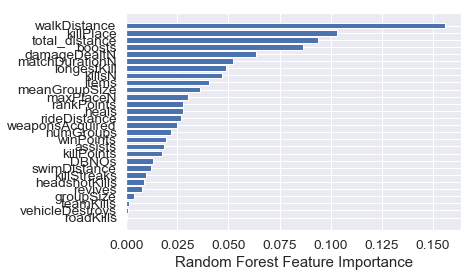

In [35]:
duo_feature_importance = duo_rf.feature_importances_
duo_sorted_idx = duo_feature_importance.argsort()
plt.barh(duo_xTrain.columns[duo_sorted_idx], duo_feature_importance[duo_sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
thresholds = [0.01,0.02,0.03,0.04,0.05]
bestThre = 0.01
acc = 0
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(duo_rf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(duo_xTrain)
    # train model
    selection_model = RandomForestClassifier(n_estimators= 30)
    selection_model.fit(select_X_train, duo_yTrain)
    # eval model
    select_X_val = selection.transform(duo_xVal)
    predictions = selection_model.predict(select_X_val)
    accuracy = accuracy_score(duo_yVal, predictions)
    if accuracy > acc:
        acc = accuracy
        bestThre = thresh
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.010, n=21, Accuracy: 92.68%
Thresh=0.020, n=16, Accuracy: 92.63%
Thresh=0.030, n=11, Accuracy: 92.68%
Thresh=0.040, n=9, Accuracy: 92.68%
Thresh=0.050, n=6, Accuracy: 92.35%


In [37]:
indices = np.argsort(-duo_feature_importance)
i = 0
while duo_feature_importance[indices[i]] > bestThre:
    i += 1
print(i, ' features to keep')

11  features to keep


In [38]:
duo_featKeep = xTrain.columns[indices[:i]]
duo_featKeep

Index(['walkDistance', 'killPlace', 'total_distance', 'boosts', 'damageDealtN',
       'matchDurationN', 'longestKill', 'killsN', 'items', 'meanGroupSize',
       'maxPlaceN'],
      dtype='object')

### Squad data

In [39]:
# Find the important features for squad
squad_trainRF = squad_train.sample(n = 50000, random_state = 0)
squad_xTrain = squad_trainRF.copy().drop(columns ='y')
squad_yTrain = squad_trainRF['y']
squad_xVal = squad_val.copy().drop(columns ='y')
squad_yVal = squad_val['y']

In [40]:
squad_rf = RandomForestClassifier(n_estimators= 100, max_features='sqrt')
squad_rf.fit(squad_xTrain, squad_yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Text(0.5, 0, 'Random Forest Feature Importance')

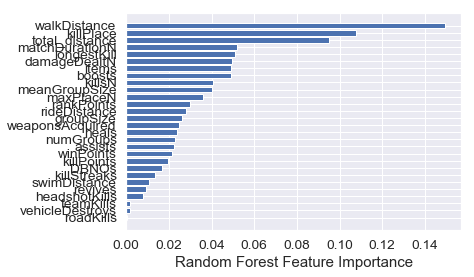

In [41]:
squad_feature_importance = squad_rf.feature_importances_
squad_sorted_idx = squad_feature_importance.argsort()
plt.barh(squad_xTrain.columns[squad_sorted_idx], squad_feature_importance[squad_sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
thresholds = [0.01,0.02,0.03,0.04,0.05]
bestThre = 0.01
acc = 0
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(squad_rf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(squad_xTrain)
    # train model
    selection_model = RandomForestClassifier(n_estimators= 30)
    selection_model.fit(select_X_train, squad_yTrain)
    # eval model
    select_X_val = selection.transform(squad_xVal)
    predictions = selection_model.predict(select_X_val)
    accuracy = accuracy_score(squad_yVal, predictions)
    if accuracy > acc:
        acc = accuracy
        bestThre = thresh
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.010, n=23, Accuracy: 91.94%
Thresh=0.020, n=19, Accuracy: 91.95%
Thresh=0.030, n=11, Accuracy: 91.70%
Thresh=0.040, n=10, Accuracy: 91.79%
Thresh=0.050, n=5, Accuracy: 91.07%


In [43]:
indices = np.argsort(-squad_feature_importance)
i = 0
while squad_feature_importance[indices[i]] > bestThre:
    i += 1
print(i, ' features to keep')

19  features to keep


In [44]:
squad_featKeep = xTrain.columns[indices[:i]]
squad_featKeep

Index(['walkDistance', 'killPlace', 'total_distance', 'matchDurationN',
       'longestKill', 'damageDealtN', 'items', 'boosts', 'killsN',
       'meanGroupSize', 'maxPlaceN', 'rankPoints', 'rideDistance', 'groupSize',
       'weaponsAcquired', 'heals', 'numGroups', 'assists', 'winPoints'],
      dtype='object')

# Random Forest Classifier

## Full

In [57]:
xTrain_full = train[featKeep]

In [58]:
rf_full = RandomForestClassifier(n_estimators = 100)
rf_full.fit(xTrain_full, train['y'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### evaluation on model validation set

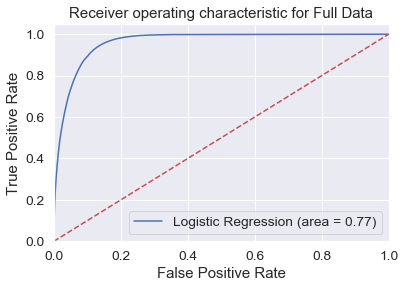

In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
yPred_full = rf_full.predict(modelVal[featKeep])
rf_roc_auc = roc_auc_score(modelVal['y'], yPred_full)
yProba = rf_full.predict_proba(modelVal[featKeep])[:,1]
fpr, tpr, thresholds = roc_curve(modelVal['y'], yProba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Full Data')
plt.legend(loc="lower right")
plt.savefig('rf_full_ROC')
plt.show()


In [93]:
rf_full.score(modelVal[featKeep], modelVal['y'])

0.9311946559732799

In [61]:
from sklearn.metrics import f1_score
f1_score(modelVal['y'], yPred_full)

0.6301800591238913

In [64]:
from sklearn.metrics import average_precision_score
average_precision_score(modelVal['y'], yProba)

0.7294695942729166

## Solo

In [45]:
rf_solo_xTrain = solo_train[solo_featKeep]

In [53]:
rf_solo = RandomForestClassifier(n_estimators = 100)
rf_solo.fit(rf_solo_xTrain, solo_train['y'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### evaluation on model validation set

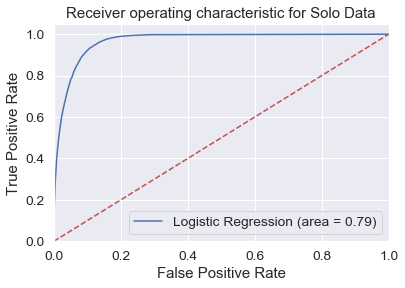

In [82]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
yPred_solo = rf_solo.predict(solo_modelVal[solo_featKeep])
rf_roc_auc = roc_auc_score(solo_modelVal['y'], yPred_solo)
solo_yProba = rf_solo.predict_proba(solo_modelVal[solo_featKeep])[:,1]
fpr, tpr, thresholds = roc_curve(solo_modelVal['y'], solo_yProba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Solo Data')
plt.legend(loc="lower right")
plt.savefig('rf_solo_ROC')
plt.show()

In [92]:
rf_solo.score(solo_modelVal[solo_featKeep], solo_modelVal['y'])

0.9373099019939168

In [56]:
from sklearn.metrics import f1_score
f1_score(solo_modelVal['y'], yPred_solo)

0.6706480510047615

In [66]:
from sklearn.metrics import average_precision_score
average_precision_score(solo_modelVal['y'], solo_yProba)

0.7663548496562888

## duo

In [67]:
rf_duo_xTrain = duo_train[duo_featKeep]

In [69]:
rf_duo = RandomForestClassifier(n_estimators = 100)
rf_duo.fit(rf_duo_xTrain, duo_train['y'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### evaluation on model validation set

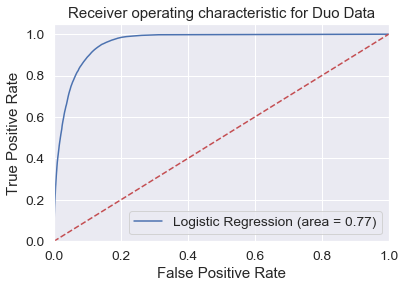

In [81]:
yPred_duo = rf_duo.predict(duo_modelVal[duo_featKeep])
rf_roc_auc = roc_auc_score(duo_modelVal['y'], yPred_duo)
duo_yProba = rf_duo.predict_proba(duo_modelVal[duo_featKeep])[:,1]
fpr, tpr, thresholds = roc_curve(duo_modelVal['y'], duo_yProba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Duo Data')
plt.legend(loc="lower right")
plt.savefig('rf_duo_ROC')
plt.show()

In [94]:
rf_duo.score(duo_modelVal[duo_featKeep], duo_modelVal['y'])

0.9321028846559952

In [72]:
f1_score(duo_modelVal['y'], yPred_duo)

0.6357621895957949

In [73]:
from sklearn.metrics import average_precision_score
average_precision_score(duo_modelVal['y'], duo_yProba)

0.7255774552881684

## squad

In [74]:
rf_squad_xTrain = squad_train[squad_featKeep]

In [75]:
rf_squad = RandomForestClassifier(n_estimators = 100)
rf_squad.fit(rf_squad_xTrain, squad_train['y'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### evaluation on model validation set

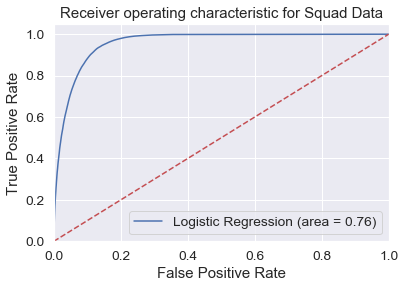

In [80]:
yPred_squad = rf_squad.predict(squad_modelVal[squad_featKeep])
rf_roc_auc = roc_auc_score(squad_modelVal['y'], yPred_squad)
squad_yProba = rf_squad.predict_proba(squad_modelVal[squad_featKeep])[:,1]
fpr, tpr, thresholds = roc_curve(squad_modelVal['y'], squad_yProba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Squad Data')
plt.legend(loc="lower right")
plt.savefig('rf_squad_ROC')
plt.show()

In [95]:
rf_squad.score(squad_modelVal[squad_featKeep], squad_modelVal['y'])

0.9273534199310867

In [78]:
f1_score(squad_modelVal['y'], yPred_squad)

0.61540350101888

In [79]:
from sklearn.metrics import average_precision_score
average_precision_score(squad_modelVal['y'], squad_yProba)

0.7057965293758696

## Evaluate Final Model on Test set

In [97]:
rf_full.score(test[featKeep], test['y'])

0.9312577478204317

In [98]:
f1_score(test['y'], rf_full.predict(test[featKeep]))

0.6303119003854818

In [100]:
average_precision_score(test['y'], rf_full.predict_proba(test[featKeep])[:,1])

0.7257176427991519

In [102]:
rf_solo.score(solo_test[solo_featKeep], solo_test['y'])

0.935829443506472

In [103]:
f1_score(solo_test['y'], rf_solo.predict(solo_test[solo_featKeep]))

0.6631213069169273

In [104]:
average_precision_score(solo_test['y'], rf_solo.predict_proba(solo_test[solo_featKeep])[:,1])

0.7557102132085175

In [105]:
rf_duo.score(duo_test[duo_featKeep], duo_test['y'])

0.9330538328137955

In [106]:
f1_score(duo_test['y'], rf_duo.predict(duo_test[duo_featKeep]))

0.6400918699028748

In [107]:
average_precision_score(duo_test['y'], rf_duo.predict_proba(duo_test[duo_featKeep])[:,1])

0.7251964355982405

In [108]:
rf_squad.score(squad_test[squad_featKeep], squad_test['y'])

0.9276057064624298

In [109]:
f1_score(squad_test['y'], rf_squad.predict(squad_test[squad_featKeep]))

0.6163971655066552

In [111]:
average_precision_score(squad_test['y'], rf_squad.predict_proba(squad_test[squad_featKeep])[:,1])

0.7026036234180407